In [ ]:
import numpy as np
import pandas as pd

# Constants
h = 0.1  # Spatial step size
k = 0.001  # Time step size
r = 0.1  # Given r = k / h^2
L = 1  # Length of the spatial domain
T = 0.02  # Total time to simulate
N = int(L / h)  # Number of spatial points
M = 20  # Number of time points to display, adjusted to j=20

# Initial condition function
def initial_condition(x):
    if x <= 0.5:
        return 2 * x
    else:
        return 2 * (1 - x)

# Initialize u with zeros
u = np.zeros((N+1, M+1))

# Apply initial condition
for i in range(N+1):
    u[i, 0] = initial_condition(i * h)

# Apply boundary conditions: u(0, t) = 0 and u(L, t) = 0 for all t > 0
u[0, :] = 0
u[N, :] = 0

# Time-stepping solution using the explicit method
for j in range(0, M):
    for i in range(1, N):
        u[i, j+1] = r*u[i-1, j] + (1-2*r)*u[i, j] + r*u[i+1, j]

# Convert the results into a DataFrame for better readability, focusing on i=0 to i=10 and j=0 to j=20
df_u = pd.DataFrame(u[:11, :21])  # Adjust the slice as needed for different ranges

# Transpose the DataFrame to have j as rows and i as columns
df_u_transposed = df_u.transpose()

# Renaming the index and columns for clarity
df_u_transposed.index = [f"j={j}" for j in range(21)]  # Adjust for j=0 to j=20
df_u_transposed.columns = [f"i={i}" for i in range(11)]  # Adjust for i=0 to i=10




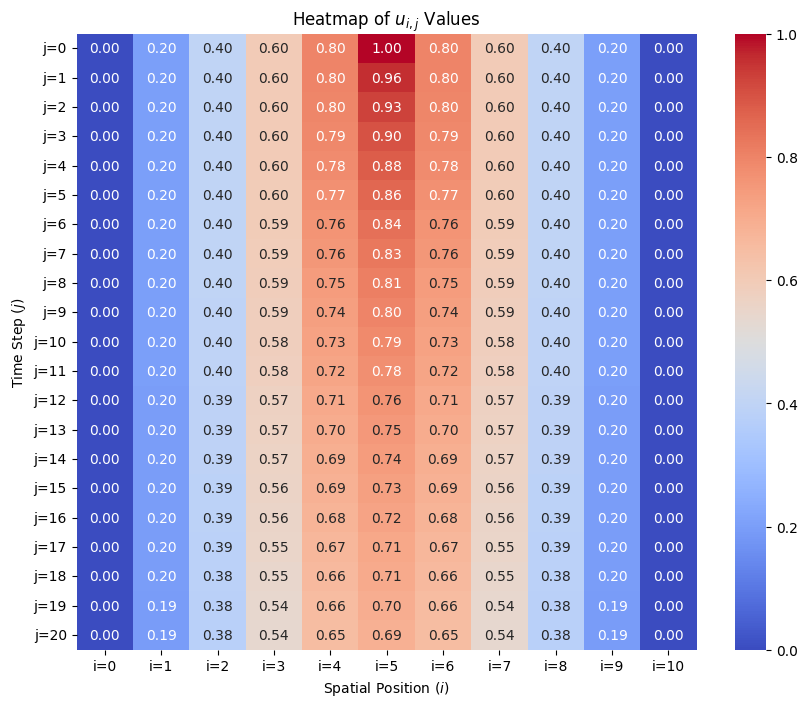

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame is ready (df_u_transposed from the previous code)
# Using seaborn's heatmap function for visualization for better color representation
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
sns.heatmap(df_u_transposed.astype(float), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of $u_{i,j}$ Values")
plt.xlabel("Spatial Position ($i$)")
plt.ylabel("Time Step ($j$)")
plt.show()


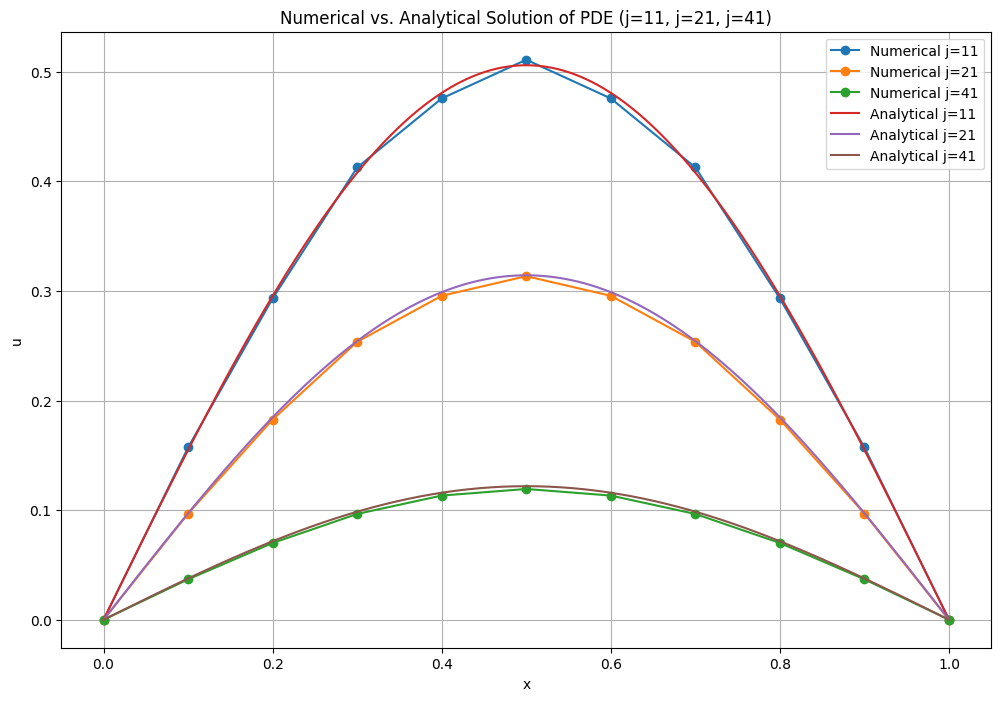

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Adjusted parameters
r = 0.48
h = 0.1
k = r * h**2  # Calculating k based on r and h

# Constants for the spatial domain and time steps
L = 1  # Length of the spatial domain
N = int(L / h)  # Number of spatial points
M = 50  # Number of time points for visualization up to j=40

# Initial condition function
def initial_condition(x):
    if x <= 0.5:
        return 2 * x
    else:
        return 2 * (1 - x)

# Initialize u with zeros for the new computation
u = np.zeros((N+1, M+1))

# Apply initial and boundary conditions
for i in range(N+1):
    u[i, 0] = initial_condition(i * h)
u[0, :] = 0
u[N, :] = 0

# Time-stepping solution using the explicit method with the adjusted k
for j in range(M):
    for i in range(1, N):
        u[i, j+1] = r*u[i-1, j] + (1-2*r)*u[i, j] + r*u[i+1, j]
# Define the analytical solution with the corrected series terms
def analytical_solution(x, t, terms=100):
    sum_series = 0
    for n in range(1, terms+1):
        term = (1 / n**2) * np.sin(0.5 * n * np.pi) * np.sin(n * np.pi * x) * np.exp(-n**2 * np.pi**2 * t)
        sum_series += term
    return (8 / np.pi**2) * sum_series

# Assuming u and x_positions are defined as before, ensure x_positions matches the spatial discretization in u
N = int(L / h)  # Number of spatial points, should match the spatial discretization used in u
x_positions = np.linspace(0, 1, N+1)  # Adjust x_positions to match the spatial discretization of u

# Ensure time_values correctly correspond to desired time steps within the computed range of u
time_values = [10*k, 20*k, 40*k]  # Physical times for j=11, 21, and 41

plt.figure(figsize=(12, 8))

# Plotting the numerical solutions with lines and dots
plt.plot(x_positions, u[:, 10], 'o-', label='Numerical j=11')  # Numerical solution for j=11
plt.plot(x_positions, u[:, 20], 'o-', label='Numerical j=21')  # Numerical solution for j=21
plt.plot(x_positions, u[:, 40], 'o-', label='Numerical j=41')  # Numerical solution for j=41

# Assuming the analytical_solution function is defined and calculates the correct values
# Plotting the analytical solutions as continuous lines for comparison
time_values = [10*k, 20*k, 40*k]  # Correct physical times for j=11, j=21, and j=41
for j, t in zip([11, 21, 41], time_values):
    analytical_vals = [analytical_solution(x, t) for x in np.linspace(0, 1, 500)]  # More points for a smoother curve
    plt.plot(np.linspace(0, 1, 500), analytical_vals, label=f'Analytical j={j}')

plt.xlabel('x')
plt.ylabel('u')
plt.title('Numerical vs. Analytical Solution of PDE (j=11, j=21, j=41)')
plt.legend()
plt.grid(True)
plt.show()




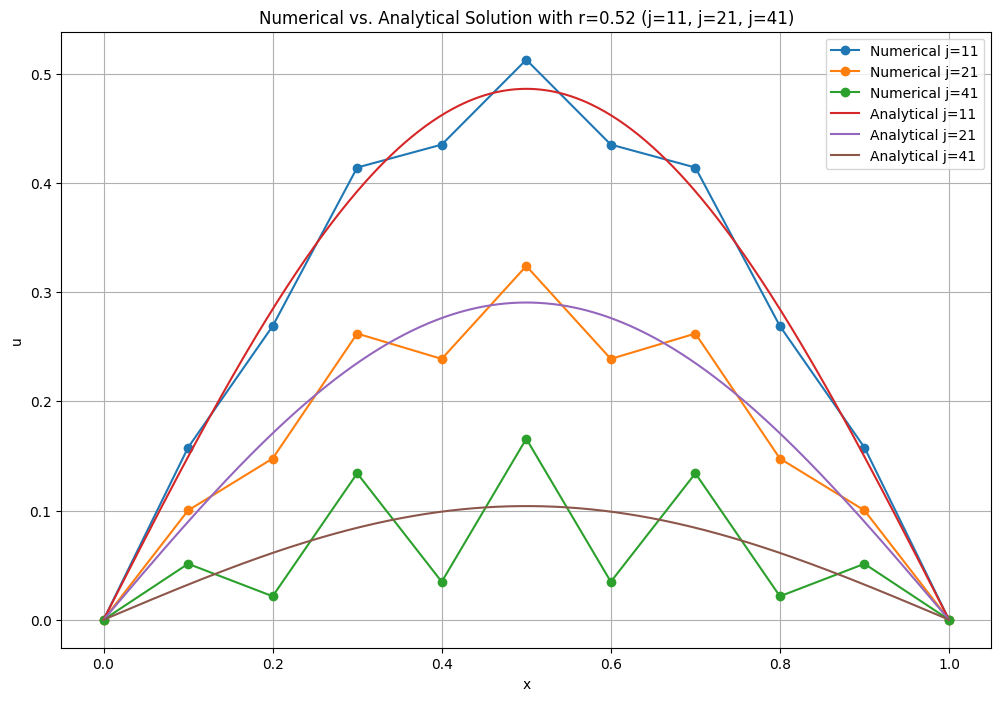

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusted parameters
r = 0.52
h = 0.1
k = r * h**2  # Recalculating k based on the new r value

# Constants for the spatial domain and time steps
L = 1  # Length of the spatial domain
N = int(L / h)  # Number of spatial points
M = 50  # Number of time points for visualization up to j=41

# Initial condition function
def initial_condition(x):
    if x <= 0.5:
        return 2 * x
    else:
        return 2 * (1 - x)

# Reinitialize u with zeros for the new computation
u = np.zeros((N+1, M+1))

# Apply initial and boundary conditions
for i in range(N+1):
    u[i, 0] = initial_condition(i * h)
u[0, :] = 0
u[N, :] = 0

# Time-stepping solution using the explicit method with the adjusted k
for j in range(M):
    for i in range(1, N):
        u[i, j+1] = r*u[i-1, j] + (1-2*r)*u[i, j] + r*u[i+1, j]

# Define the analytical solution function
def analytical_solution(x, t, terms=100):
    sum_series = 0
    for n in range(1, terms+1):
        term = (1 / n**2) * np.sin(0.5 * n * np.pi) * np.sin(n * np.pi * x) * np.exp(-n**2 * np.pi**2 * t)
        sum_series += term
    return (8 / np.pi**2) * sum_series

# Plotting the numerical and analytical solutions
plt.figure(figsize=(12, 8))

# Numerical solution with markers
x_positions = np.linspace(0, L, N+1)  # Spatial positions from 0 to 1
plt.plot(x_positions, u[:, 10], 'o-', label='Numerical j=11')
plt.plot(x_positions, u[:, 20], 'o-', label='Numerical j=21')
plt.plot(x_positions, u[:, 40], 'o-', label='Numerical j=41')

# Analytical solution for comparison
time_values = [10*k, 20*k, 40*k]
for j, t in zip([11, 21, 41], time_values):
    analytical_vals = [analytical_solution(x, t) for x in np.linspace(0, 1, 500)]
    plt.plot(np.linspace(0, 1, 500), analytical_vals, label=f'Analytical j={j}')

plt.xlabel('x')
plt.ylabel('u')
plt.title('Numerical vs. Analytical Solution with r=0.52 (j=11, j=21, j=41)')
plt.legend()
plt.grid(True)
plt.show()
